# K-Means Clustering

A method of unsupervised learning where we cluster data into segments.

Need to decide which distance equation to use.

The K value chooses the amount of clusters to create.

Randomly select K number of points and assign nearest points to that cluster. We then calculate the mean value of the cluster points to find the center of the cluster and reclassify the points.

Repeat the steps until we no longer reassign points.

### Coding an example of K-Means

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/modeedna/Desktop/LEARN/UDEMY/Python Data Science/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/bank-full.csv')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


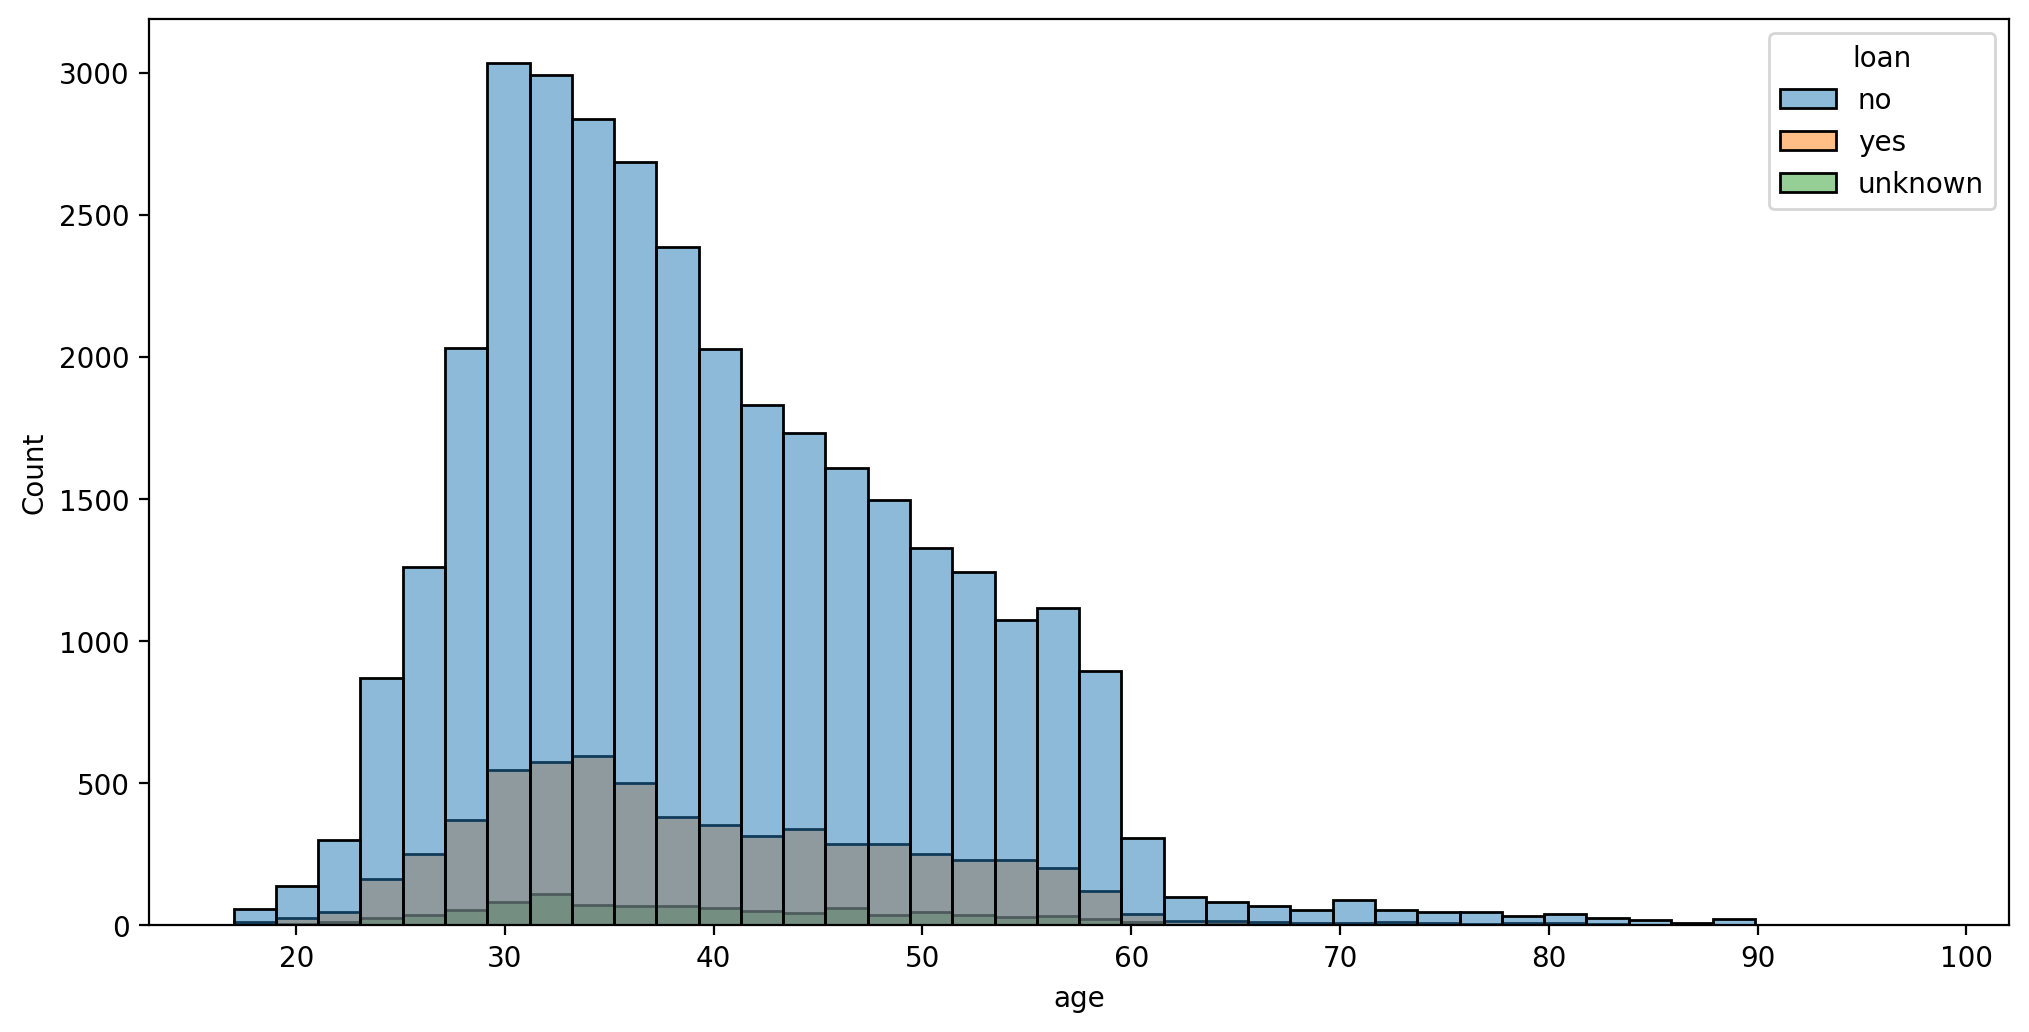

In [10]:
# distribution of age per classification of loan
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data=df, x='age', bins=40, hue='loan');

In [11]:
# look for unique values for type of contact
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

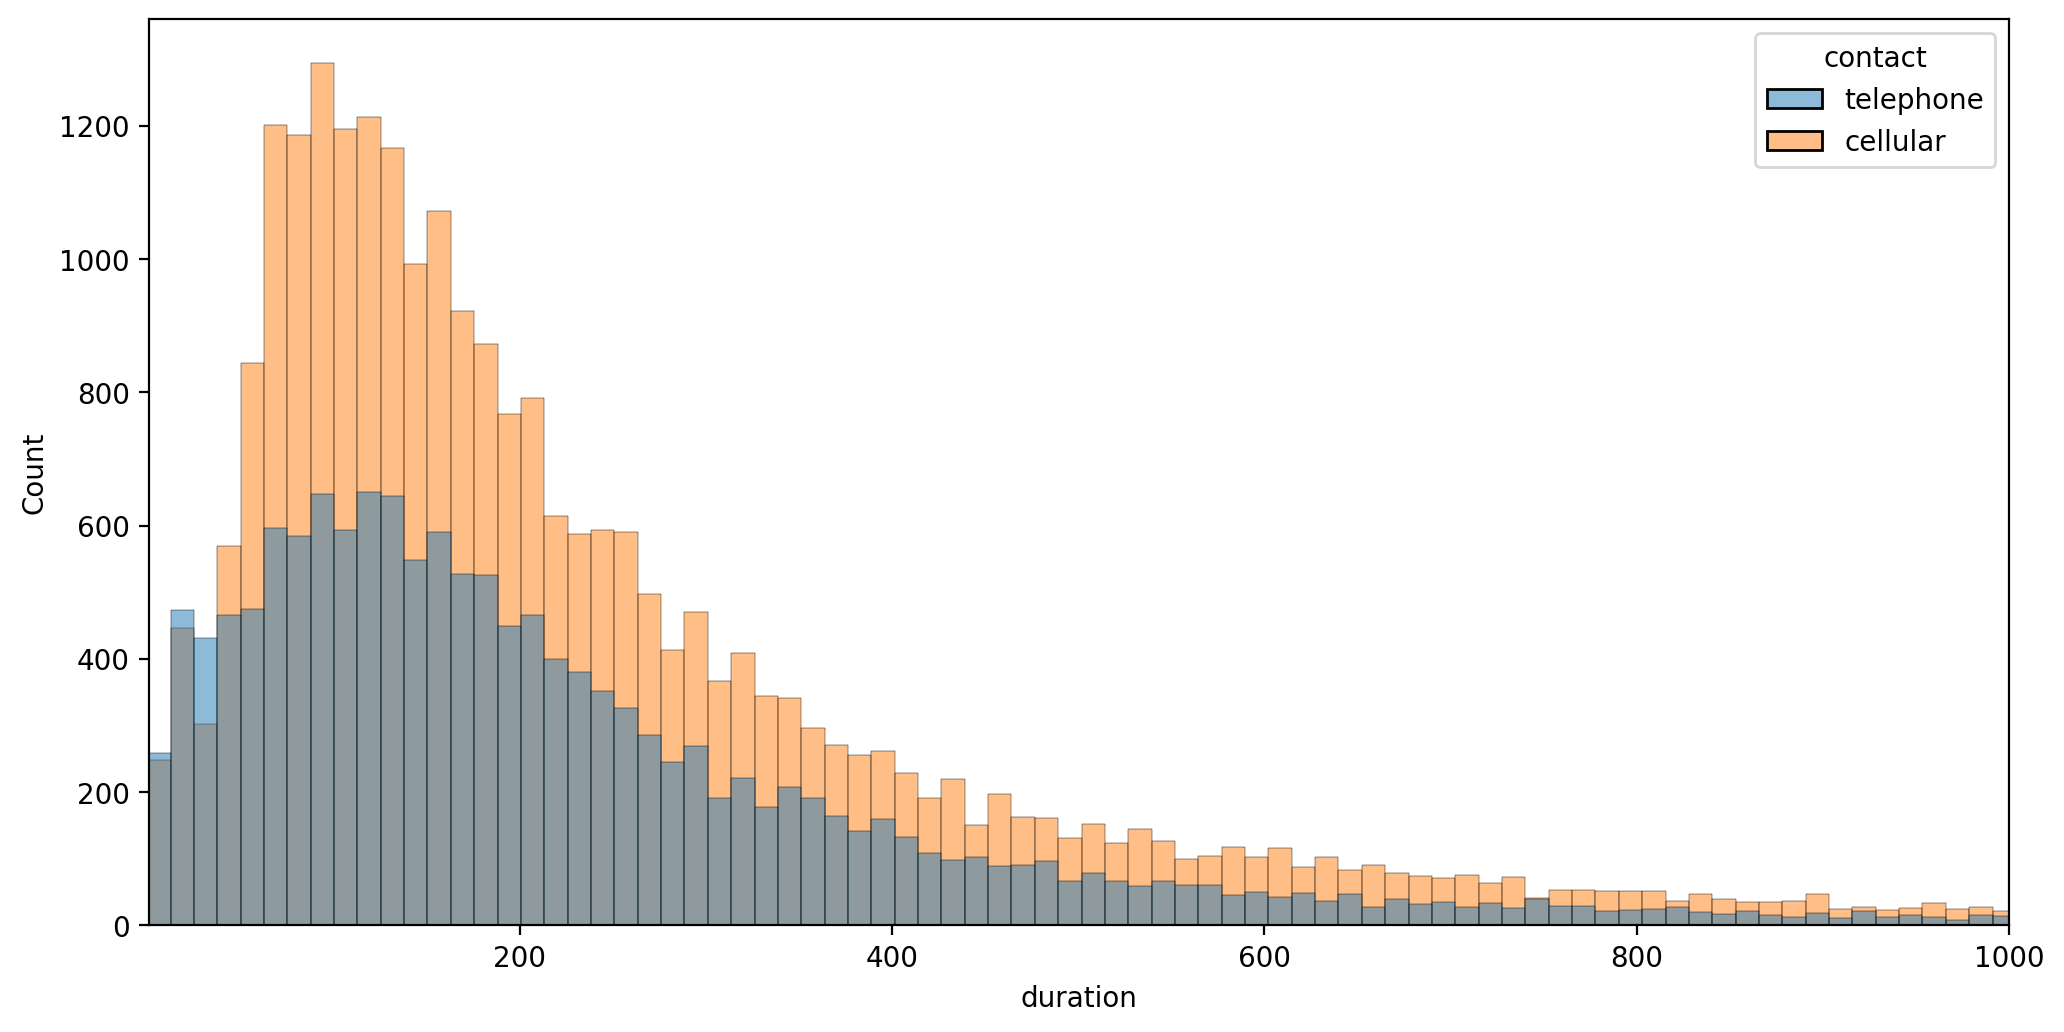

In [14]:
# look at the distribution of contact duration
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data=df, x='duration', hue='contact')
plt.xlim(1,1000);

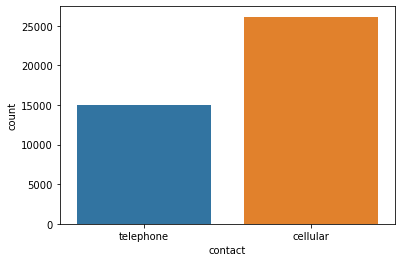

In [15]:
# confirm that cellular has a higher count than telephone
sns.countplot(data=df, x='contact');

In [20]:
df['job'].value_counts().index

Index(['admin.', 'blue-collar', 'technician', 'services', 'management',
       'retired', 'entrepreneur', 'self-employed', 'housemaid', 'unemployed',
       'student', 'unknown'],
      dtype='object')

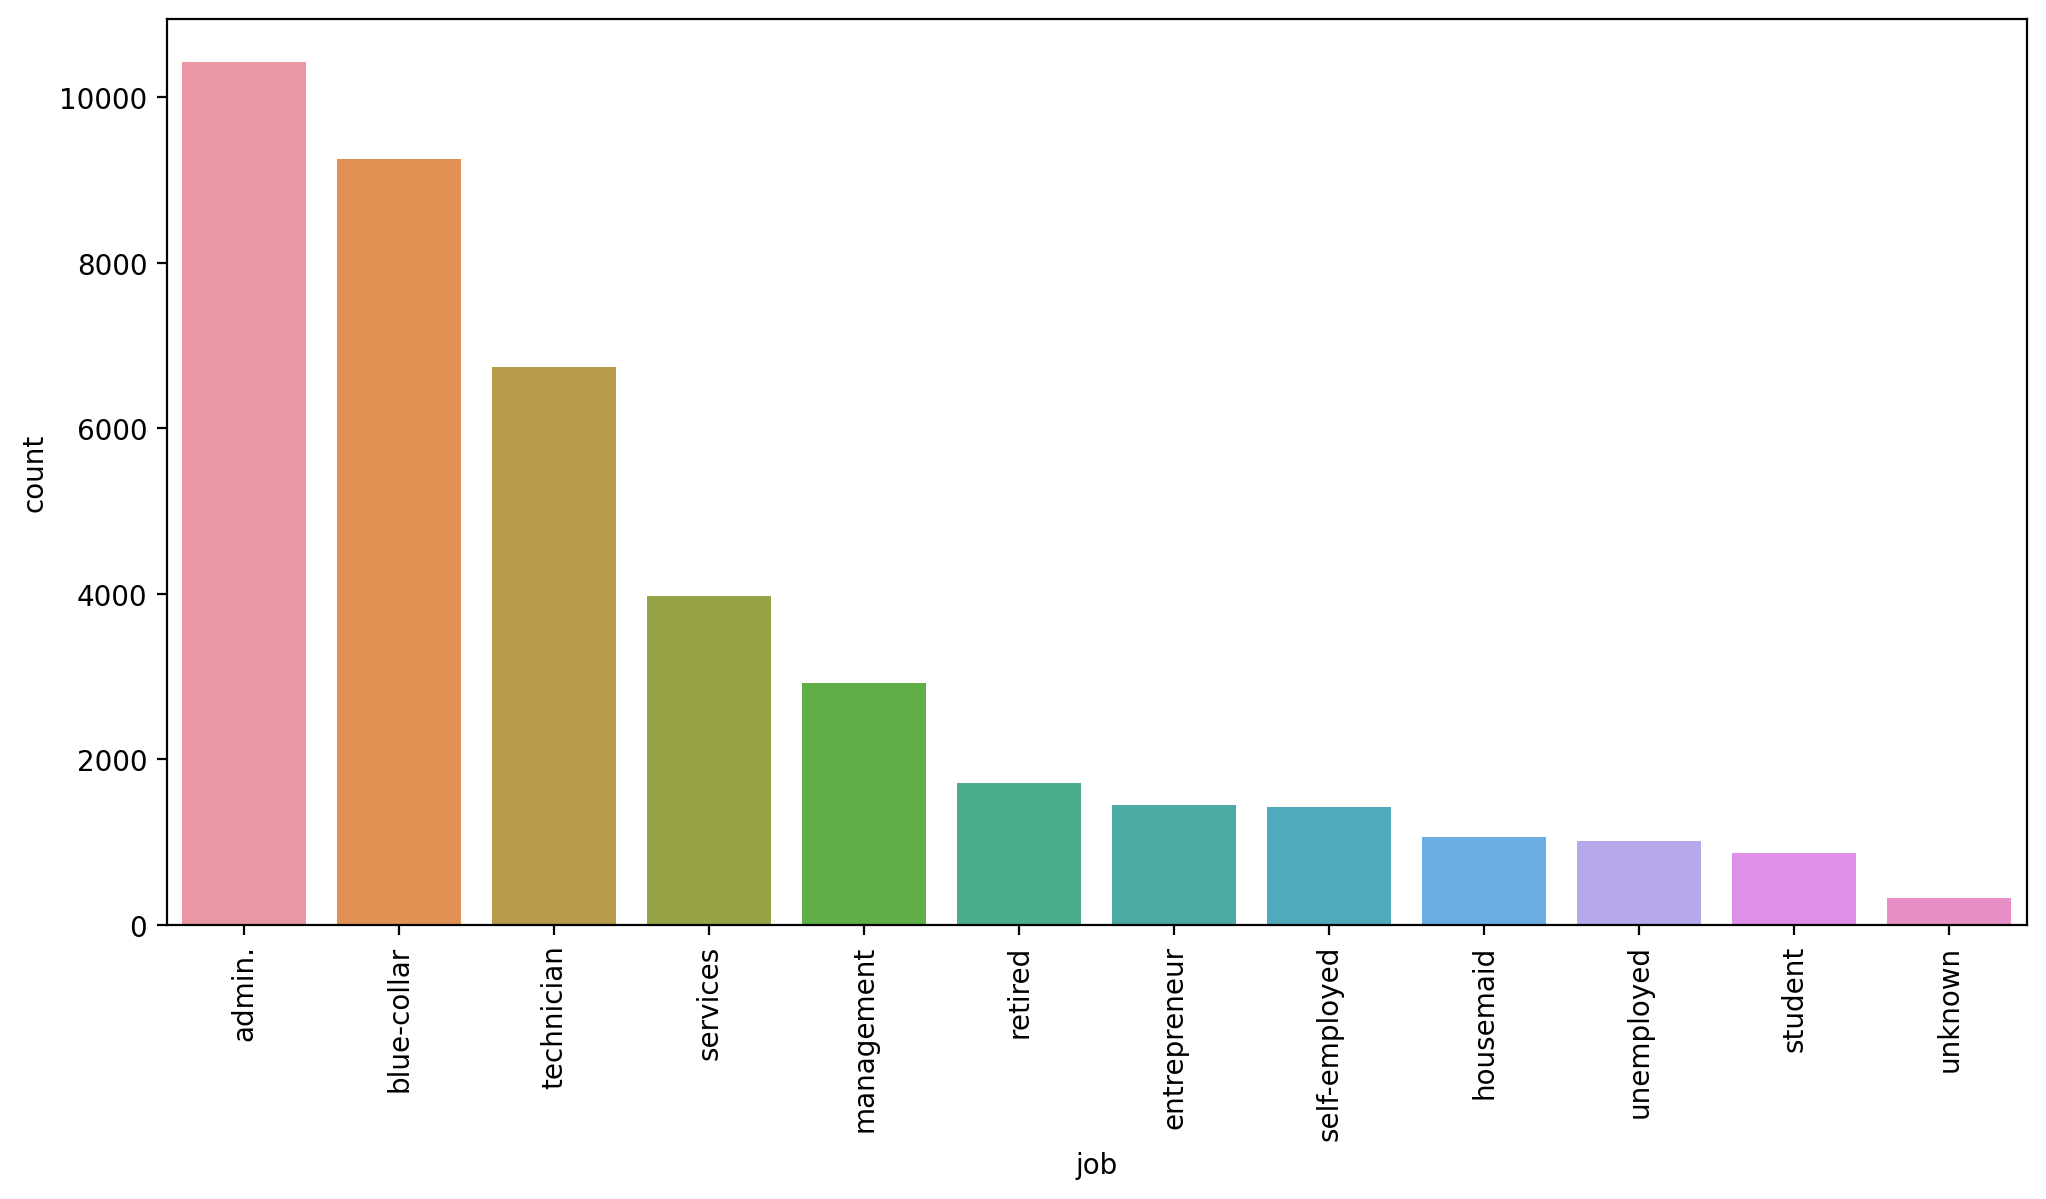

In [24]:
# looking at types of jobs
plt.figure(figsize=(12,6), dpi=200)
sns.countplot(data=df, x='job', order=df['job'].value_counts().index)
plt.xticks(rotation=90);

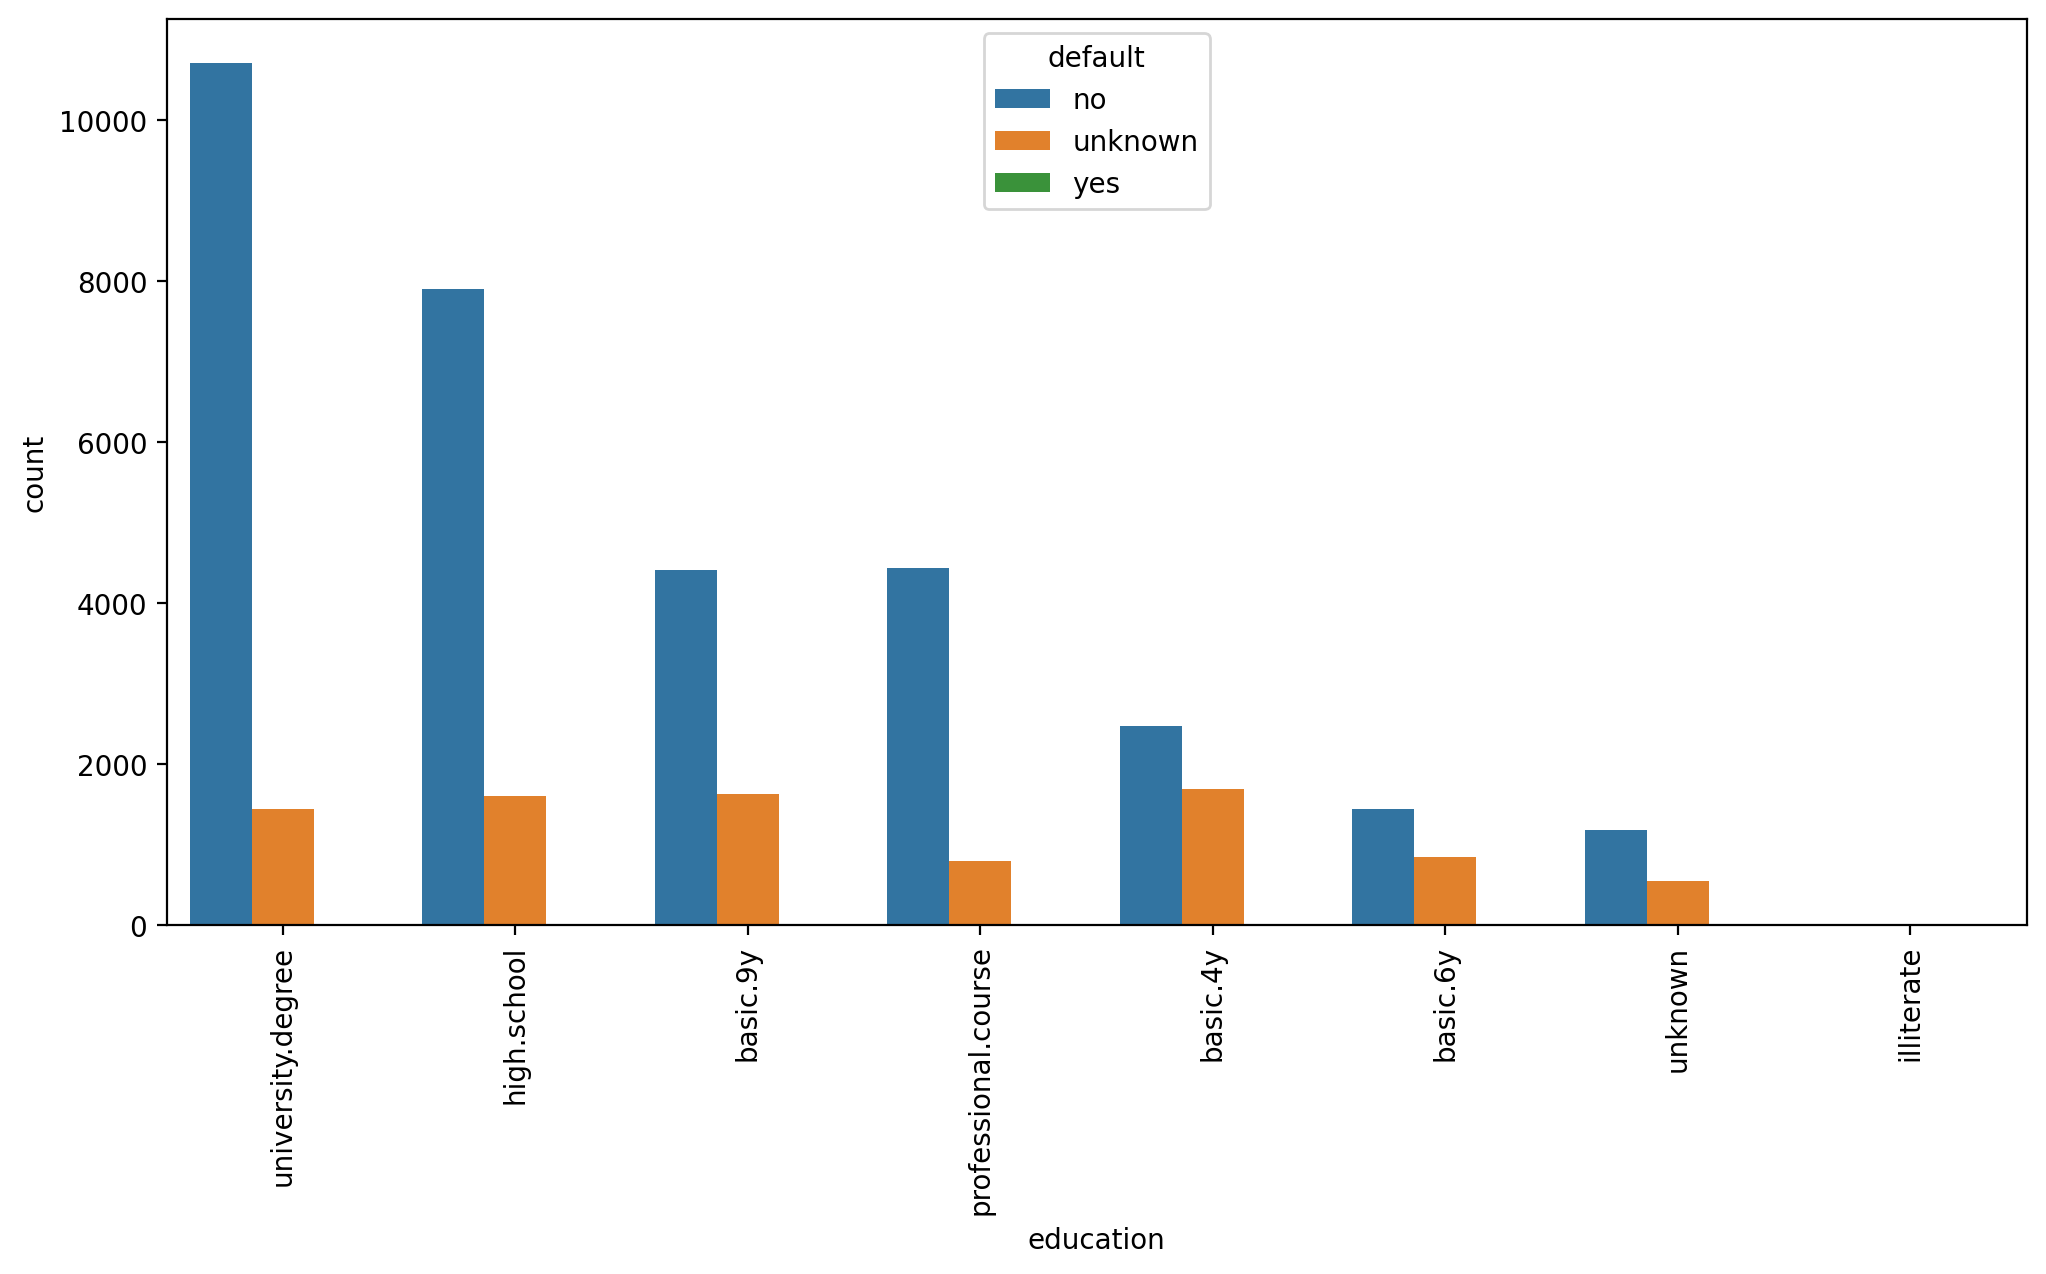

In [26]:
# looking at types of education by default class
plt.figure(figsize=(12,6), dpi=200)
sns.countplot(data=df, x='education', order=df['education'].value_counts().index, hue='default')
plt.xticks(rotation=90);

In [28]:
# confirming how many people we have as defaulted
# makes sense given that most people don't have a loan
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

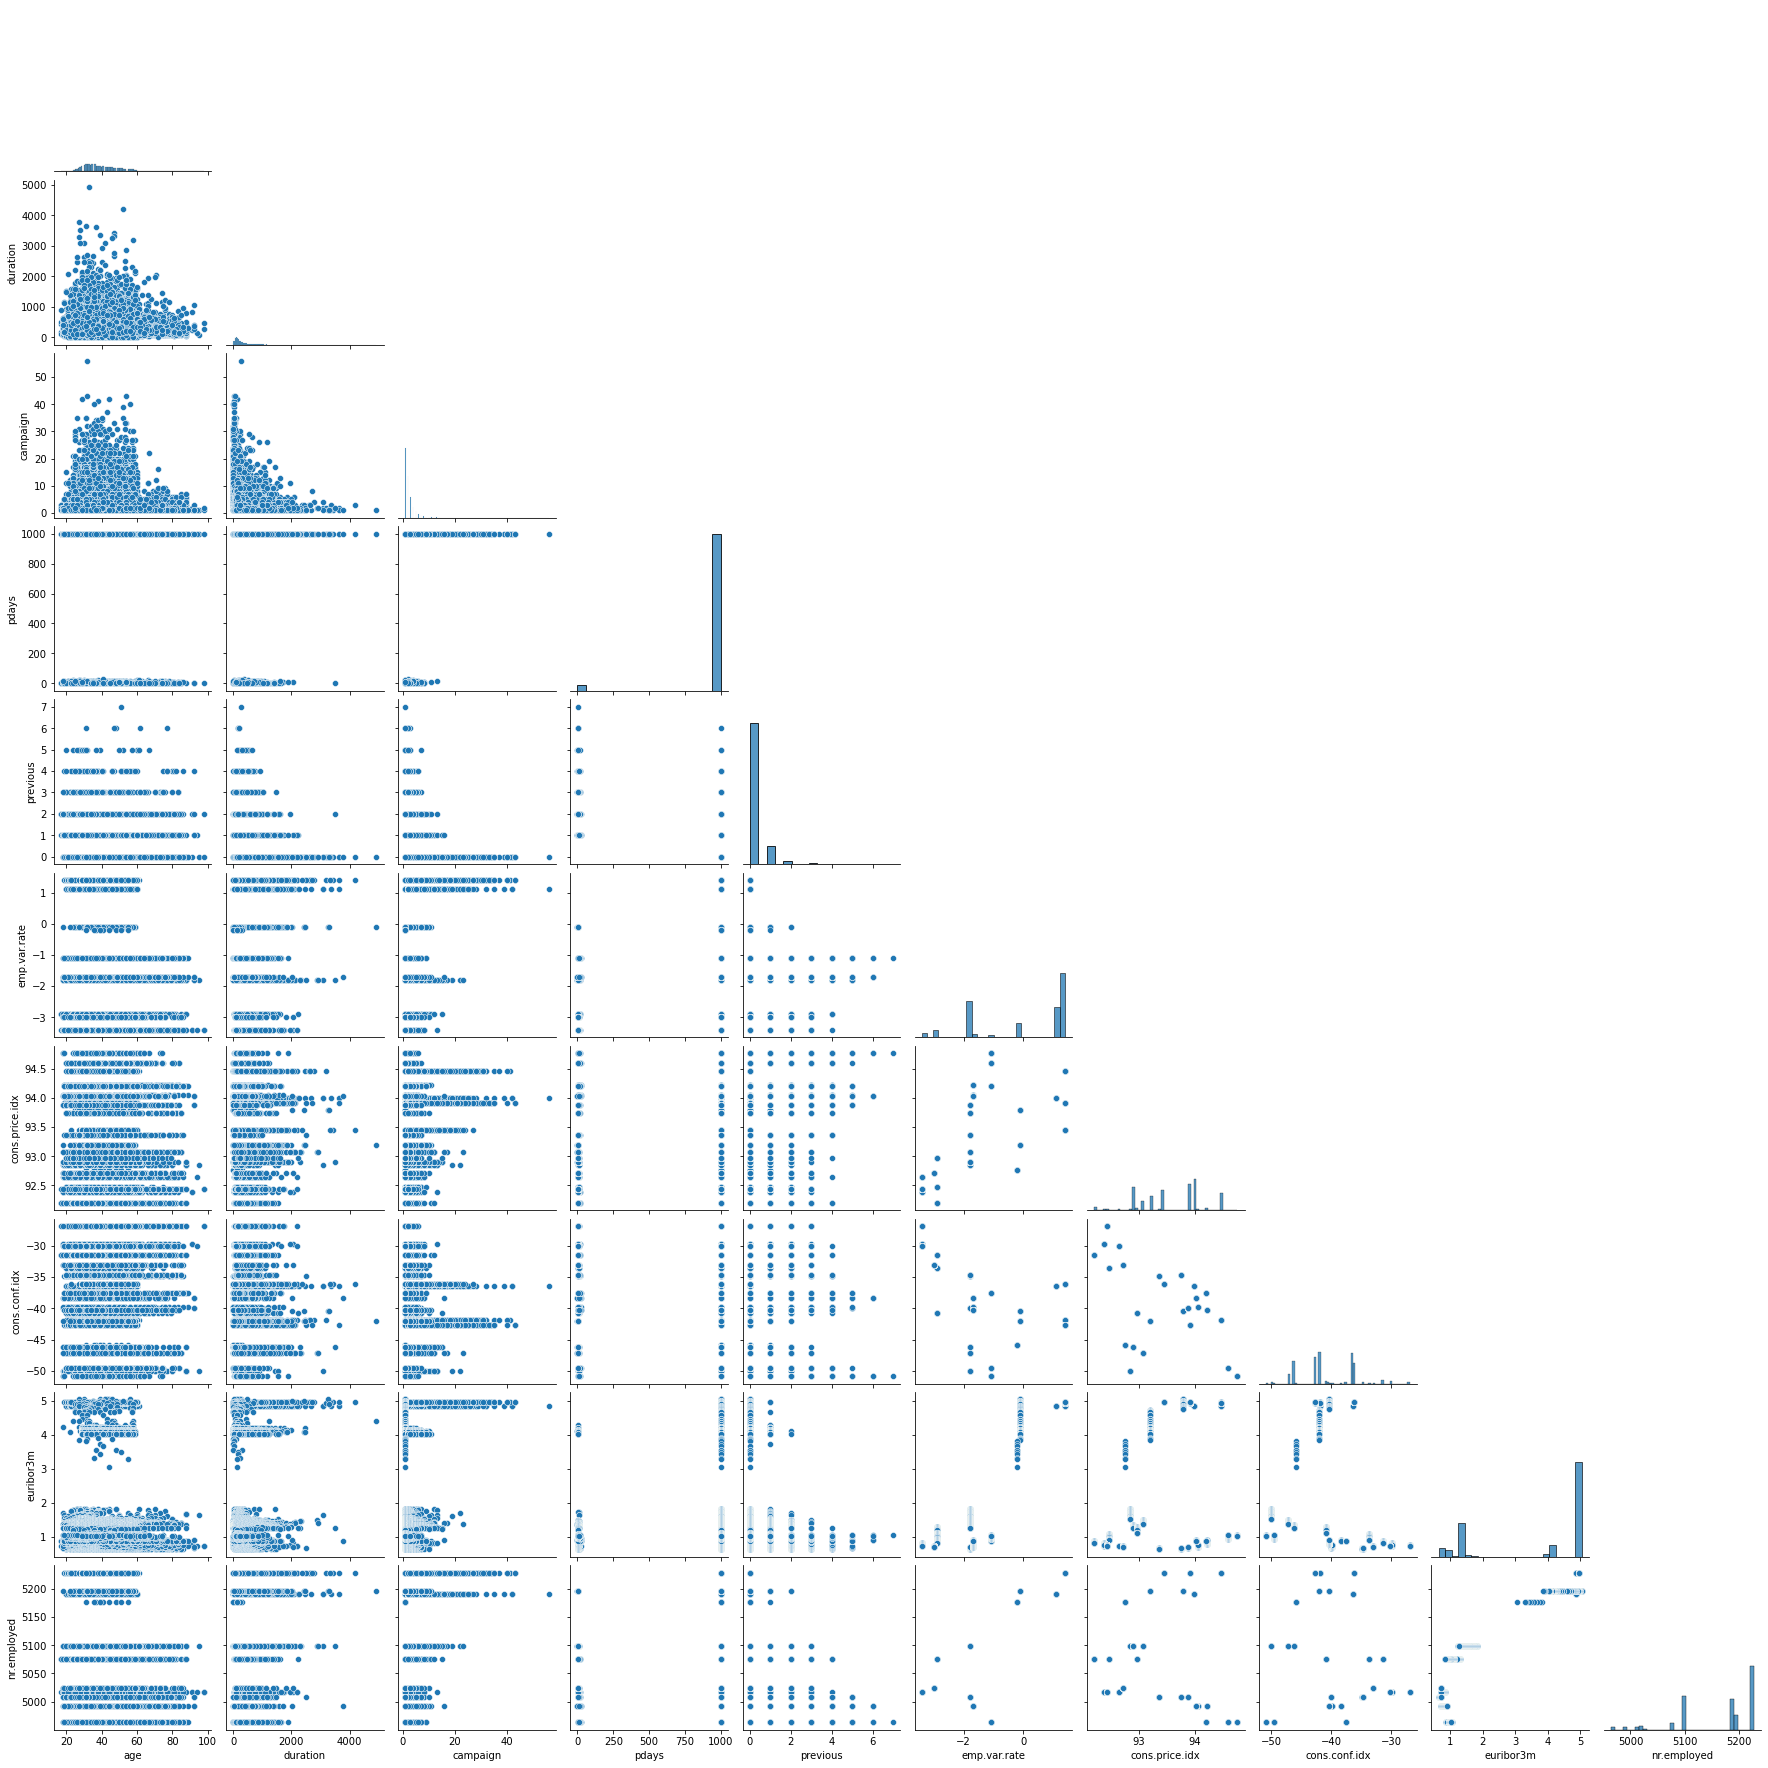

In [31]:
sns.pairplot(df, corner=True);

### Actual clustering

In order to check distance, we need to get dummy variables for categorical data.

In [32]:
X = pd.get_dummies(df)

In [33]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1


In [34]:
# we need to scale the data given that we're dealing with distance metrics

from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [36]:
from sklearn.cluster import KMeans

In [37]:
# in a marketing classificaiton, we think there could be two categories
model = KMeans(n_clusters=2)

In [38]:
# fits the data and predicts/assigns the cluster labels
cluster_labels = model.fit_predict(scaled_X)

In [39]:
cluster_labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [40]:
# add the labels back to the dataset
X['Cluster'] = cluster_labels

In [41]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,Cluster
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,1,0,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,1,0,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,0,1,0


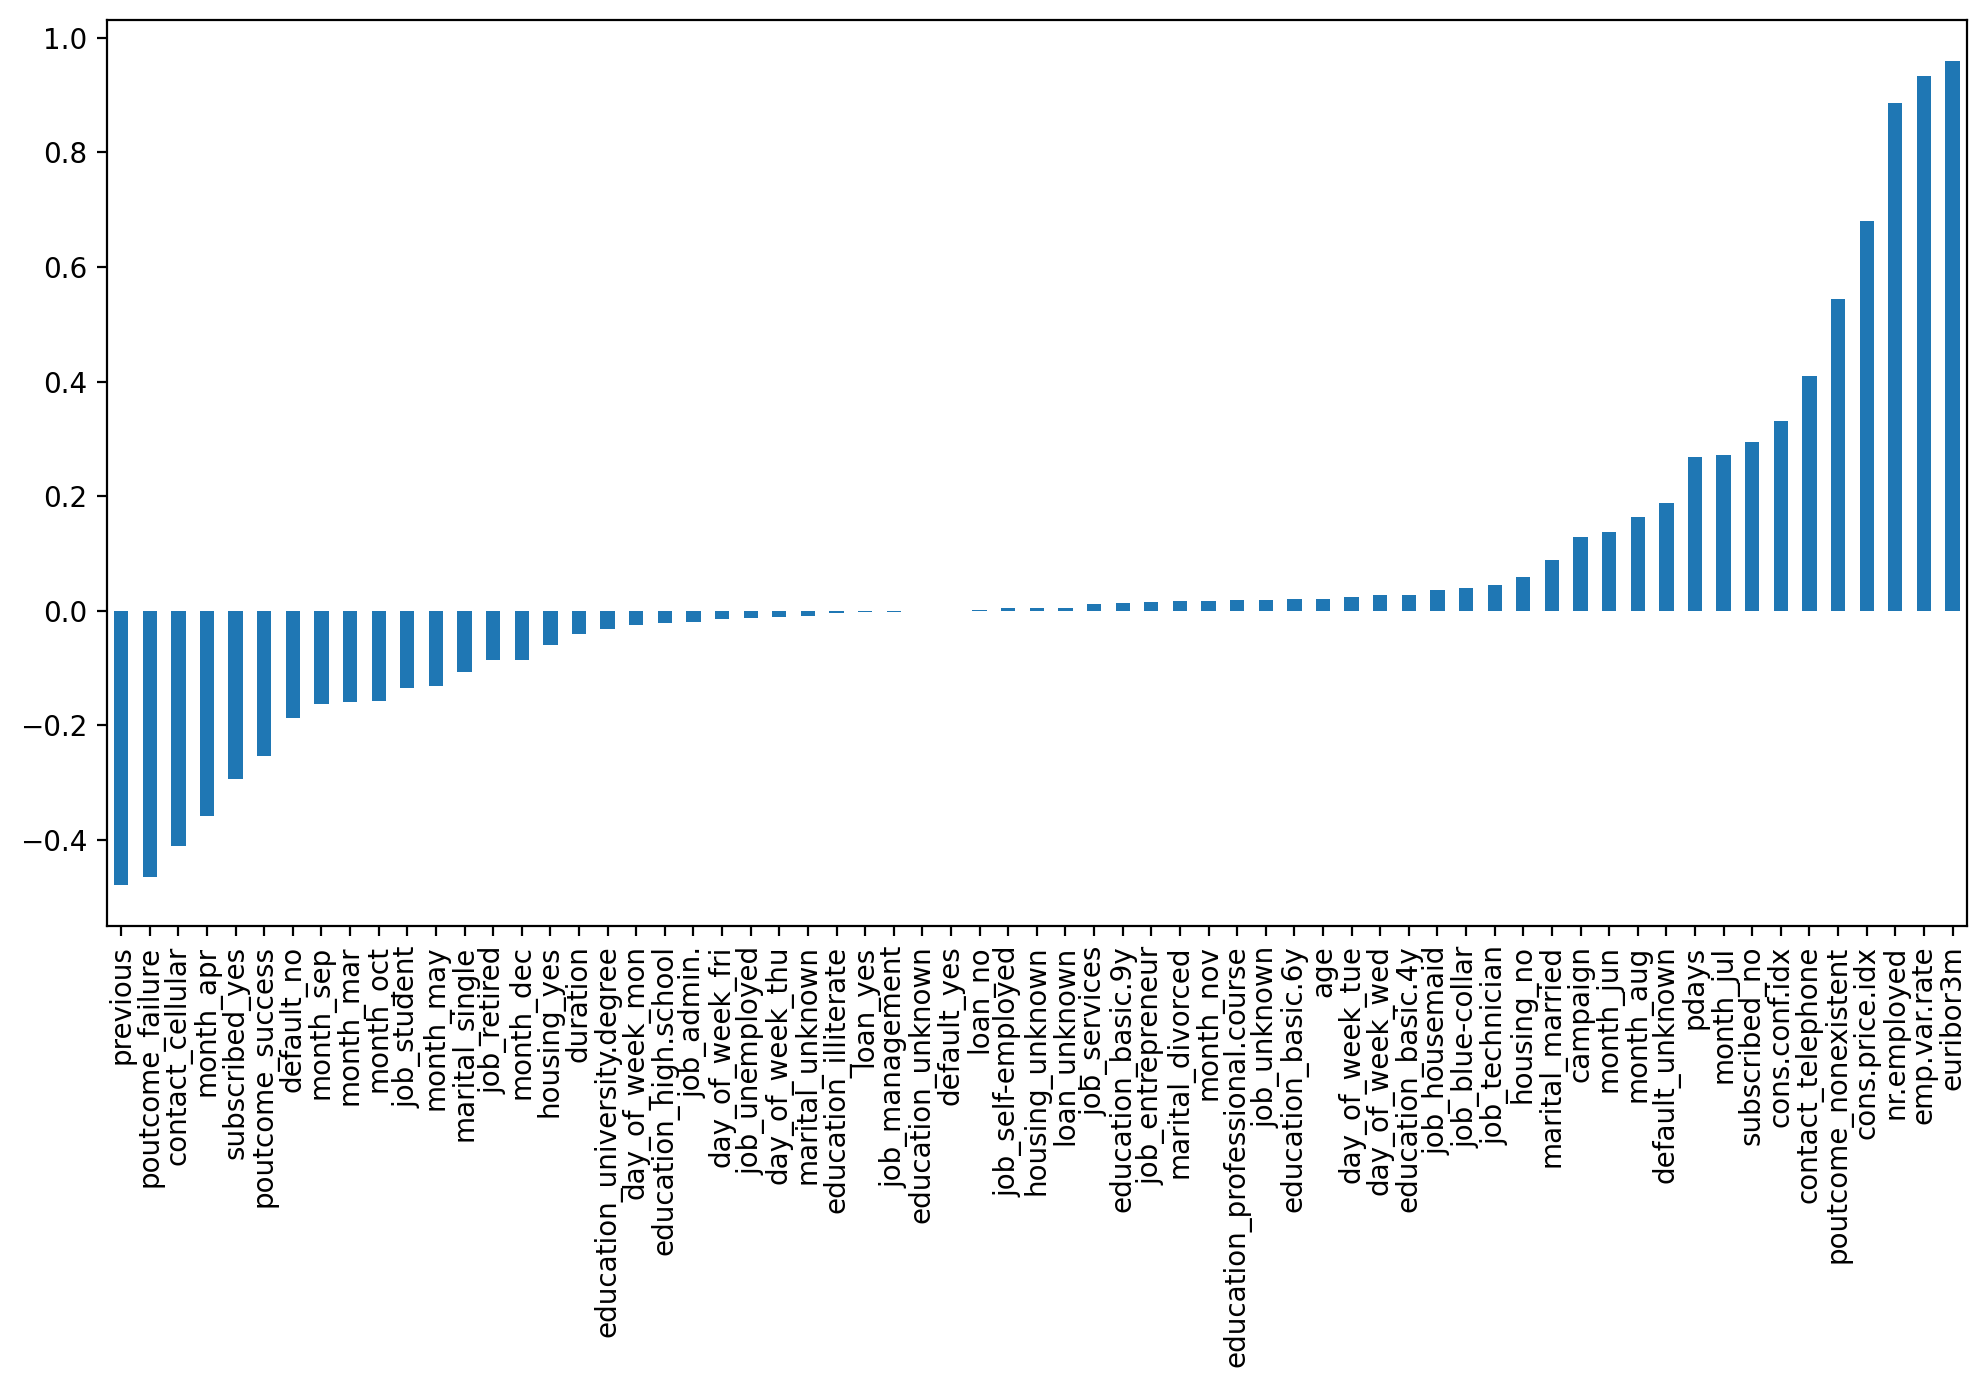

In [48]:
# check the correlation between features and the classification
# remove correlation of cluster to itself
plt.figure(figsize=(12,6), dpi=200)
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar');

### Methodologies for choosing a K value

A measure for correctness of model, we can measure the distance of the points to the cluster center, square them, and then sum.

SSD: sum of the squared distance.

We can use an elbow graph. The more Ks we have, the higher the chance for overfitting. 

In [49]:
ssd = []

for k in range(2, 10):
    
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    
    # inertia is the SSD
    ssd.append(model.inertia_)

In [55]:
ssd

[2469792.361662774,
 2370416.297425569,
 2271502.7007717513,
 2219763.268689005,
 2151167.246764666,
 2115518.8740852866,
 2037733.5260520997,
 2003362.3674089347]

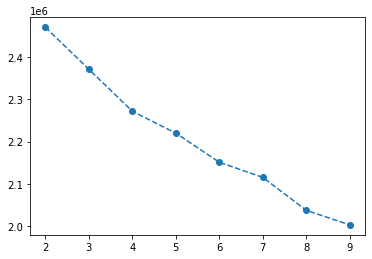

In [57]:
plt.plot(range(2, 10), ssd, 'o--');

In [58]:
# turn the values into a series
pd.Series(ssd)

0    2.469792e+06
1    2.370416e+06
2    2.271503e+06
3    2.219763e+06
4    2.151167e+06
5    2.115519e+06
6    2.037734e+06
7    2.003362e+06
dtype: float64

In [59]:
# look at the drop of SSDs from one K to the next
pd.Series(ssd).diff()

0             NaN
1   -99376.064237
2   -98913.596654
3   -51739.432083
4   -68596.021924
5   -35648.372679
6   -77785.348033
7   -34371.158643
dtype: float64

### KMeans color quantization

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [61]:
image_as_array = mpimg.imread('/Users/modeedna/Desktop/LEARN/UDEMY/Python Data Science/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/palm_trees.jpg')

In [63]:
image_as_array.shape

(1401, 934, 3)

In [64]:
image_as_array

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  99],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 107],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 115],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

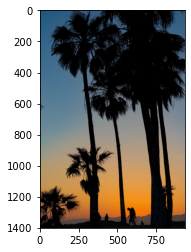

In [67]:
# show image
# plt.figure(dpi=200)
plt.imshow(image_as_array);

In [68]:
# reassign to individual variables
(h, w, c) = image_as_array.shape

In [70]:
# reshape to 2d
image_as_array2d = image_as_array.reshape(h*w, c)

In [72]:
from sklearn.cluster import KMeans

In [73]:
model = KMeans(n_clusters=6)

In [74]:
labels = model.fit_predict(image_as_array2d)

In [79]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [83]:
quantized_image = np.reshape(rgb_codes[labels], (h, w, c))

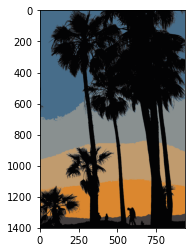

In [85]:
plt.imshow(quantized_image)